# Question 1: 
Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 




In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

#### Read the CSV 

In [2]:
# Load the data

file_path = Path('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
shopify_df = pd.read_csv(file_path)
shopify_df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


 I believe that the AOV $3145.13 is coming from the mean of the order_amount. To get a clear picture, let's look into the descriptive statistics of the order_amount, which will help us to summarize the central tendency, dispersion and the distribution of dataset.

In [3]:
# Exploring the distribution of the Dataset in terms of order value

shopify_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We have a total of 5000 orders made over 30-day window. From the above output it’s clear that the AOV 3,145.13 is obtained from the mean of the orders. But there is an incredibly high standard deviation of 41282.54. This means that on average, the values vary 41,282.54 from the mean, making the mean not a very useful representation of the AOV.

Above output also depicts the minimum order value as 90 and maximum order value as 704,000. Other statistics includes first quartile (Q1) being 163, median being 284 and third quartile (Q3) being 390. Comparing these numbers, we can see that the maximum value (704000) is much higher than the other values. Considering our dataset has 5000 records, there are probably a few outlier values that are incredibly high and dragging up the mean.

Lets explore this further.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7efbc4bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7efbdc2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7efbc4850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7efbdc970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7efbdcc70>],
 'means': []}

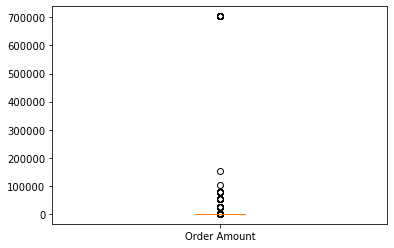

In [4]:
# Boxplot to understand distribution in detail

order_amount = shopify_df['order_amount'].values
plt.boxplot(order_amount, labels = ['Order Amount'])

From the above plot, we see most of the transactions are in range of few hundred or a few thousand dollars but some are quite huge ranging in order of hundereds of thousands. Let's explore this further to check for data issues or anomalies.

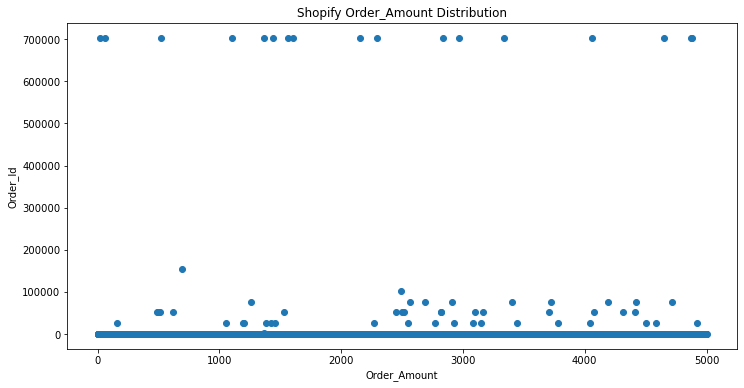

In [5]:
# Scatterplot to understand the order_amount for each of our 5000 transactions in detail

plt.figure(figsize=(12,6))
plt.scatter(x = shopify_df['order_id'], y = shopify_df['order_amount'], marker='o');
plt.title("Shopify Order_Amount Distribution")
plt.xlabel("Order_Amount")
plt.ylabel("Order_Id")
plt.show()


Each point represent one transaction. Notice that most of the transactions are along the dark blue line, which corresponds to purchases that are a few hundred or a few thousand dollars - plausible order amounts. Few orders are in the higher range (around 700,000). 

In [11]:
# Checking the outlier values

shopify_df_points = shopify_df.groupby(['order_amount']).size()
outlier_values =shopify_df_points.reset_index(name='num_data_points').sort_values(by='order_amount', ascending = False)
outlier_values.head(10)

,order_amount,num_data_points
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


We calculated the number of transactions made with each order amount and further sorted them in descending order by order_amount. From the above output, we see that higher order values particularily 704000, 51450 and 25725 are repeated 17, 16 and 19 times. It's likely that these extremely large transactions are driving up the AOV.

Next, we will check the information related to these order amounts to understand the behaviour in detail.

In [7]:
# Let us filter the orders by [704000] values and check if some suspcious activities are involved.

shopify_df.loc[shopify_df['order_amount'].isin([704000])].sort_values(by='order_amount')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


We see that all of the recorded transactions of size 2000 occurred from the same user_id (607) of the same shop_id (42), with same payment_method and that the order_amount is exactly the same in each case (704000). Moreover, we see that there are some days where there are multiple identical transactions, and all purchases are made at exactly 4 a.m.. Either there was a mistake in the dataset with duplicate entries, or this customer is automating the process of buying shoes in bulk, which he or she will presumably sell at a higher price.

In [8]:
# Let us filter the orders by [51450] values and check if some suspcious activities are involved.

shopify_df.loc[shopify_df['order_amount'].isin([51450])].sort_values(by='order_amount')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
1529,1530,78,810,51450,2,cash,2017-03-29 7:12:01
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04
2495,2496,78,707,51450,2,cash,2017-03-26 4:38:52
2512,2513,78,935,51450,2,debit,2017-03-18 18:57:13
2818,2819,78,869,51450,2,debit,2017-03-17 6:25:51
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25


In [9]:
# Let us filter the orders by [25725] values and check if some suspcious activities are involved.

shopify_df.loc[shopify_df['order_amount'].isin([25725])].sort_values(by='order_amount')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
3440,3441,78,982,25725,1,debit,2017-03-19 19:02:54
3151,3152,78,745,25725,1,credit_card,2017-03-18 13:13:07
3085,3086,78,910,25725,1,cash,2017-03-26 1:59:27
2922,2923,78,740,25725,1,debit,2017-03-12 20:10:58
4584,4585,78,997,25725,1,cash,2017-03-25 21:48:44
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43


For the order_amount 51450 and 25725, we see that these orders are made from the same shop_id 78 but user_id and payment_method are different. Its possible here that the recorded data from this shop is incorrect. 

In [12]:
# Calculating max_order_amount

shopify_df.groupby('total_items').agg(
    # get max order amout for each group
    max_order_amount = ('order_amount', max)
)

,max_order_amount
total_items,
1,25725
2,51450
3,77175
4,102900
5,1760
6,154350
8,1064
2000,704000


From the above output, we get that order_amount of 1,2,3,4, and 6 items are  multiples of 25725. We already saw that the order amounts 51450 and 25725 are made from the same shop id 78. Lets check the other information for these specific orders.

In [13]:
# Exploring the distribution of dataset further for order_amount 1,2,3,4 & 6

shopify_df.loc[shopify_df['order_amount'].isin([25725,51450,77175,102900,154350])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05


So, from the output it is clear that these orders were purchased from the same shop_id(78). This implies that this particular shop is selling a shoe pair for 25725 which is unexpected for an average pair of shoes to cost. Probably there is some data issue with shop_id 78. These values are also another main outlier for dragging the mean (AOV) so high(3145.13).

### Answers

#### a). Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


While calculating the AOV, we are blindly computing the average order amount without taking into account the number of pairs of shoes purchased in each transaction. Moreover, there are many transactions that seem questionable - 
1. The 17 indentical transactions that included 2000 purchases each are driving up the AOV.
2. When we group transactions by total_items we see unlikely maximum order amounts that are multiples of 25725 for transaction sizes of 1, 2, 3, 4 and 6 items. These transactions are also driving up the AOV.
##### Due to the extreme points it would be preferable to use a robust evaluation metric; one which isn't affected by extreme values.

b). What metric would you report for this dataset?


In order to protect our evaluation metric from the effects of outliers, it would be wise to use a robust evaluation metric i.e. median.



c). What is its value?


The median is 284, which is a more reasonable value for our measure of central tendancy than the mean (3145.13).

## Question 2.

#### For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


a). How many orders were shipped by Speedy Express in total?


I did an inner join of the Orders and Shippers tables on the ShipperID column.

There were total 54 orders shipped by Speedy Express.

b). What is the last name of the employee with the most orders?


The last name of the employee is Peacock with 40 orders.



c). What product was ordered the most by customers in Germany?


The product was Boston Crab Meat with total orders of 160.